# **Library**

In [7]:
# ============================ EDA ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import shap
import joblib
#====================== Data preprocessing ======================
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#====================== Statistical analysis ======================
from scipy.stats import skew, kurtosis
import scipy.stats as stats

#====================== Visualization ======================
from mpl_toolkits.mplot3d import Axes3D  # 3D plots

#====================== Dimensionality Reduction ======================
from sklearn.decomposition import PCA

#====================== Clustering ======================
from sklearn.cluster import KMeans

#====================== Clustering Evaluation ======================
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#====================== Machine Learning Models ======================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



## **Data Understanding**





 **1)- Read Data**

In [8]:
df = pd.read_csv('a5r dataset in42allah.csv')
df.copy()
df.head()

Season  Age Childish diseases Accident or serious trauma  \
0  spring   28               yes                        yes   
1  summer   32               yes                        yes   
2    fall   35               yes                        yes   
3  summer   30               yes                         no   
4    fall   28                no                         no   

  Surgical intervention High fevers in the last year  \
0                    no                           no   
1                    no       more than 3 months ago   
2                   yes       more than 3 months ago   
3                    no                           no   
4                    no                           no   

  Frequency of alcohol consumption Smoking habit  \
0             hardly ever or never         never   
1                      once a week         never   
2              several times a day         never   
3             hardly ever or never         never   
4                      once a week    occasional   

   Number of hours spent sitting per day Diagnosis  
0                                     14    Normal  
1                                      7    Normal  
2                                      5    Normal  
3                                      6    Normal  
4                                     18    Normal

**2)- Random Sample Data**


In [9]:
# Random 5 of data
df.sample(5)

Season  Age Childish diseases Accident or serious trauma  \
3063    fall   35               yes                        yes   
2285  summer   32               yes                         no   
4372  spring   33               yes                        yes   
2116  spring   32               yes                        yes   
2300  spring   27               yes                         no   

     Surgical intervention High fevers in the last year  \
3063                   yes       more than 3 months ago   
2285                    no       more than 3 months ago   
4372                   yes       more than 3 months ago   
2116                   yes       more than 3 months ago   
2300                    no                           no   

     Frequency of alcohol consumption Smoking habit  \
3063              several times a day         never   
2285             hardly ever or never         daily   
4372             hardly ever or never         daily   
2116             several times a week         never   
2300             hardly ever or never         never   

      Number of hours spent sitting per day Diagnosis  
3063                                      5    Normal  
2285                                      1    Normal  
4372                                      7    Normal  
2116                                      3    Normal  
2300                                      8    Normal

**3)- Size of Data**


In [10]:
#How many rows and colunms
df.shape

(10000, 10)

**4)- Information of Data**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 10000 non-null  object
 1   Age                                    10000 non-null  int64 
 2   Childish diseases                      10000 non-null  object
 3   Accident or serious trauma             10000 non-null  object
 4   Surgical intervention                  10000 non-null  object
 5   High fevers in the last year           10000 non-null  object
 6   Frequency of alcohol consumption       10000 non-null  object
 7   Smoking habit                          10000 non-null  object
 8   Number of hours spent sitting per day  10000 non-null  int64 
 9   Diagnosis                              10000 non-null  object
dtypes: int64(2), object(8)
memory usage: 781.4+ KB


**5)- Check Names Of columns**


In [12]:
df.columns

Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day', 'Diagnosis'],
      dtype='object')

**6)- Check Description**

In [13]:
#generates a statistical summary for all the numerical columns in a pandas DataFrame
#Describe of Data
df.describe()

Age  Number of hours spent sitting per day
count  10000.000000                           10000.000000
mean      30.126400                              10.977100
std        2.219711                              34.582174
min       27.000000                               1.000000
25%       28.000000                               5.000000
50%       30.000000                               7.000000
75%       32.000000                               9.000000
max       36.000000                             342.000000

**7)- Number of Unique Columns**

In [14]:
#counts the number of unique values
df.nunique()

Season                                    4
Age                                      10
Childish diseases                         2
Accident or serious trauma                2
Surgical intervention                     2
High fevers in the last year              3
Frequency of alcohol consumption          5
Smoking habit                             3
Number of hours spent sitting per day    14
Diagnosis                                 2
dtype: int64

**8)- Check Balance Of Data**

In [15]:
#count for the value that repeated in the colunms
df['Age'].value_counts()

Age
30    2791
28    2763
32    1743
27     674
33     671
29     461
35     391
31     201
36     199
34     106
Name: count, dtype: int64

# **Data Clean**

**1)- Check Null(Missing Values)**

In [16]:
df.isna().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

**2)- Detect and drop duplicate rows**

In [17]:
print(f'duplicated = {df.duplicated().sum()}')
df[df.duplicated()]

duplicated = 9901


Season  Age Childish diseases Accident or serious trauma  \
9     winter   28               yes                         no   
17    spring   32               yes                        yes   
20    spring   35               yes                         no   
23      fall   30                no                         no   
27      fall   32               yes                         no   
...      ...  ...               ...                        ...   
9995    fall   33               yes                        yes   
9996    fall   30               yes                         no   
9997  winter   36               yes                         no   
9998    fall   32               yes                        yes   
9999  spring   36               yes                        yes   

     Surgical intervention High fevers in the last year  \
9                       no                           no   
17                     yes                           no   
20                     yes       more than 3 months ago   
23                     yes       more than 3 months ago   
27                      no       more than 3 months ago   
...                    ...                          ...   
9995                    no       more than 3 months ago   
9996                   yes       more than 3 months ago   
9997                   yes                           no   
9998                   yes       more than 3 months ago   
9999                   yes       more than 3 months ago   

     Frequency of alcohol consumption Smoking habit  \
9                         once a week         never   
17                        once a week         daily   
20                        once a week         daily   
23                        once a week         never   
27               several times a week    occasional   
...                               ...           ...   
9995             hardly ever or never         daily   
9996             hardly ever or never         never   
9997             several times a week    occasional   
9998             hardly ever or never         daily   
9999             several times a week         never   

      Number of hours spent sitting per day Diagnosis  
9                                        11    Normal  
17                                        5    Normal  
20                                        6   Altered  
23                                        5    Normal  
27                                        5    Normal  
...                                     ...       ...  
9995                                      9    Normal  
9996                                      7    Normal  
9997                                      5    Normal  
9998                                      5    Normal  
9999                                      7    Normal  

[9901 rows x 10 columns]

In [18]:
df=df.drop_duplicates()
print(f'duplicated = {df.duplicated().sum()}')
df[df.duplicated()]

duplicated = 0


Empty DataFrame
Columns: [Season, Age, Childish diseases, Accident or serious trauma, Surgical intervention, High fevers in the last year, Frequency of alcohol consumption, Smoking habit, Number of hours spent sitting per day, Diagnosis]
Index: []

**4)- Check outlier**

In [19]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])
#دي بتختار كل الأعمدة اللي نوعها رقمي (int أو float) علشان نطبّق عليها اكتشاف الـ Outliers.
#الأعمدة النصية مش ينفع نعمل عليها IQR.

# Compute IQR
Q1 = numeric_cols.quantile(0.25) #Q1 = القيمة اللي عندها 25% من البيانات أقل منها.
Q3 = numeric_cols.quantile(0.75) #Q3 = القيمة اللي عندها 75% من البيانات أقل منها.
IQR = Q3 - Q1 #IQR = المسافة بين الربع الأول والربع الثالث هو المدى اللي فيه أغلب البيانات الطبيعية.



# Detect outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Count of outliers per column
outliers_count = outliers.sum() #يبقى جمعهم = عدد القيم الشاذة في كل عمود
print(outliers_count) #عرض عدد الـ Outliers لكل عمود

Age                                      0
Number of hours spent sitting per day    5
dtype: int64


Numerical Columns: ['Age', 'Number of hours spent sitting per day']
Categorical Columns: ['Season', 'Childish diseases', 'Accident or serious trauma', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Diagnosis']


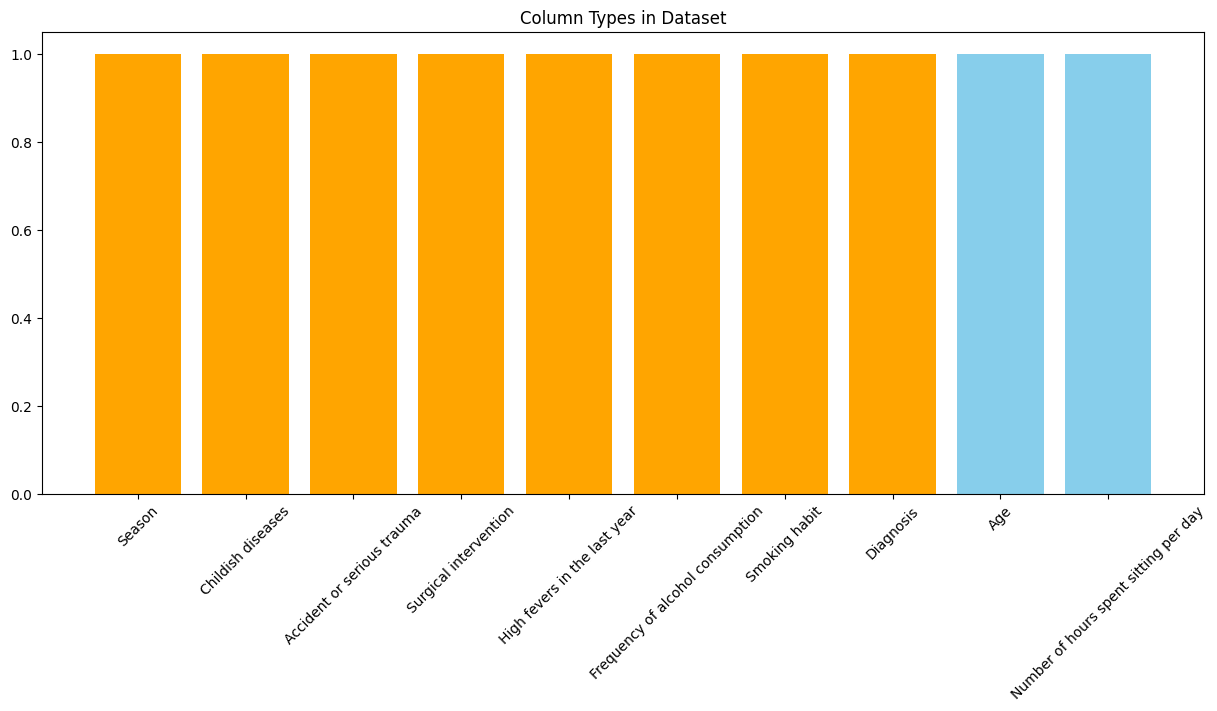

In [20]:
## Show Categorical & Numerical Columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

types = ["Categorical"] * len(cat_cols) + ["Numerical"] * len(num_cols)
colors = ["orange" if t == "Categorical" else "skyblue" for t in types]
cols = cat_cols + num_cols
# Show Bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(cols, 1, color=colors)
plt.title("Column Types in Dataset")
plt.xticks(rotation=45)

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


In [21]:
# Check Duplicated Values
print( f' Duplicated = {df.duplicated().sum()} \n====================================')
df[df.duplicated()]

 Duplicated = 0 


Empty DataFrame
Columns: [Season, Age, Childish diseases, Accident or serious trauma, Surgical intervention, High fevers in the last year, Frequency of alcohol consumption, Smoking habit, Number of hours spent sitting per day, Diagnosis]
Index: []

# **EDA**

In [22]:
df.describe().T

count       mean        std   min  \
Age                                     99.0  30.111111   2.258268  27.0   
Number of hours spent sitting per day   99.0  10.858586  33.782924   1.0   

                                        25%   50%   75%    max  
Age                                    28.0  30.0  32.0   36.0  
Number of hours spent sitting per day   5.0   7.0   9.0  342.0

# **Univariate Analysis**

**1)- Univariate Analysis
Distribution of Numerical Features**


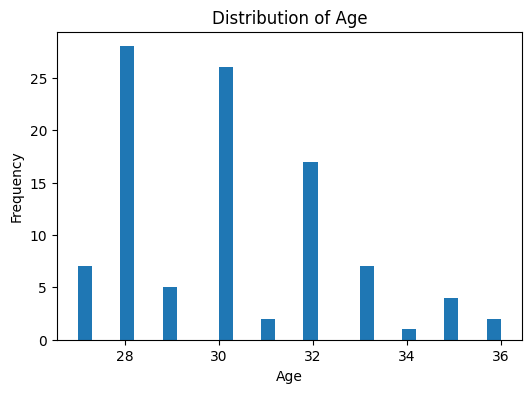

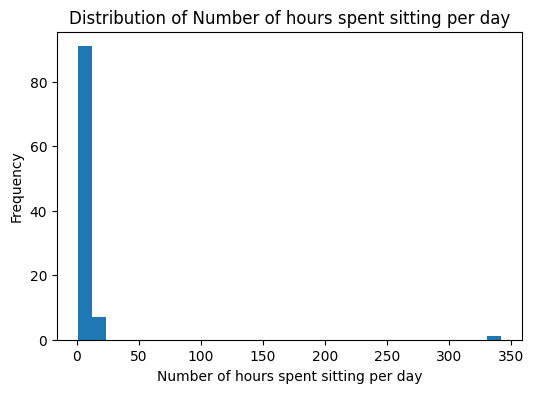

In [23]:
for col in num_cols: #بدء Loop على كل عمود رقمي
    plt.figure(figsize=(6,4)) #إنشاء شكل جديد للرسم يعني الطول 4 و العرض 6
    plt.hist(df[col].dropna(), bins=30) #يرسم Histogram → توزيع البيانات
    #.dropna() = إزالة القيم المفقودة NaN قبل الرسم.
    #df[col] = بيانات العمود الحالي.
    #bins=30 = يقسم القيم إلى 30 عمود (bars) في الرسم.

    plt.title(f"Distribution of {col}") #يكتب عنوان الشكل
    #لو العمود اسمه Age العنوان يبقى:
#Distribution of Age
    plt.xlabel(col) #لو العمود اسمه Age العنوان يبقى:
#Distribution of Age
    plt.ylabel("Frequency") #يكتب كلمة "Frequency" على المحور الرأسي
    #يعني عدد مرات ظهور القيم
    plt.show()

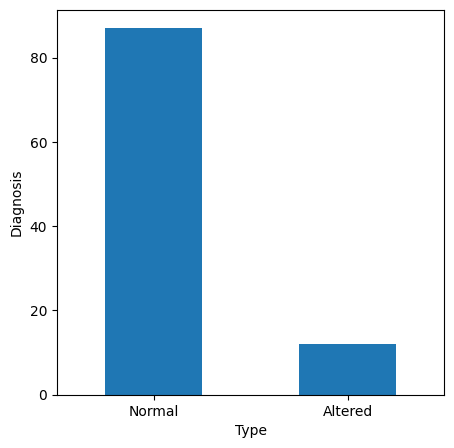

In [24]:
## Target values
df['Diagnosis'].value_counts().plot(kind='bar', figsize=(5, 5))
plt.xlabel('Type')
plt.ylabel('Diagnosis');
plt.xticks(rotation=0);

**2)- Boxplots (Outliers Detection)**

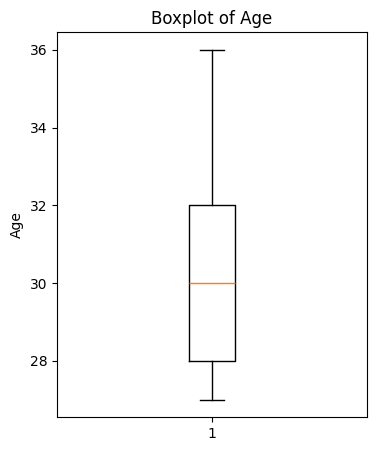

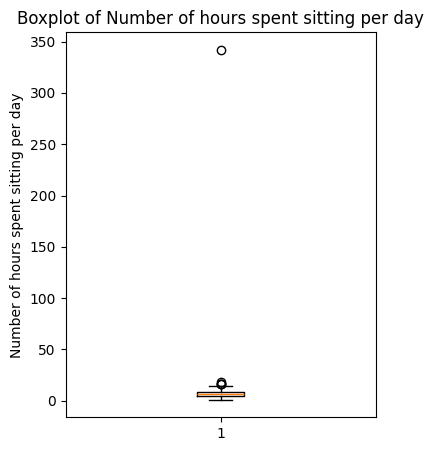

In [25]:
for col in num_cols: #عدّي على كل عمود رقمي وارسم Boxplot ليه.
    plt.figure(figsize=(4,5)) #حجم الشكل عرض 4 طول 5
    plt.boxplot(df[col].dropna()) #df[col] = بيانات العمود الحالي
    #.dropna() = إزالة أي قيم NaN
    #plt.boxplot() = رسم Boxplot للعمود.
    plt.title(f"Boxplot of {col}") #يكتب عنوان الشكل
    plt.ylabel(col) #يكتب اسم العمود على محور Y
    plt.show()

**3)- Univariate Analysis – Categorical**

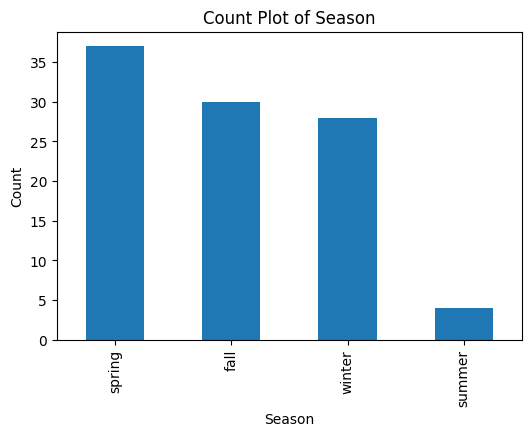

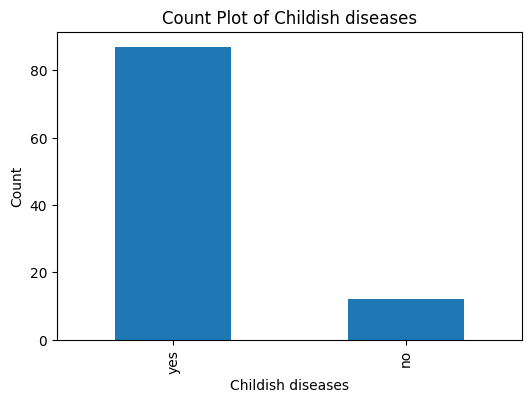

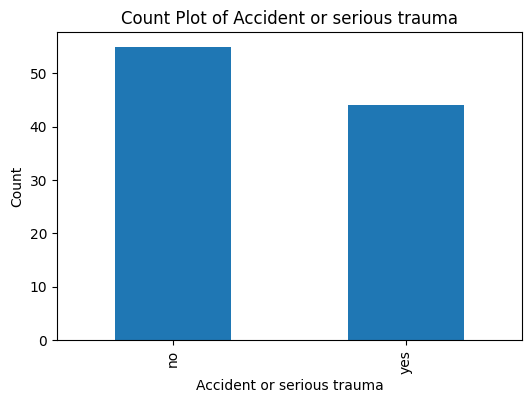

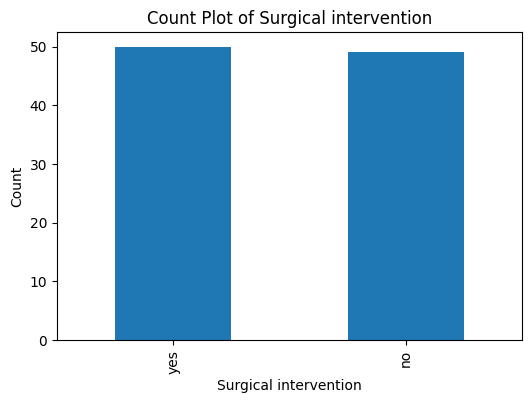

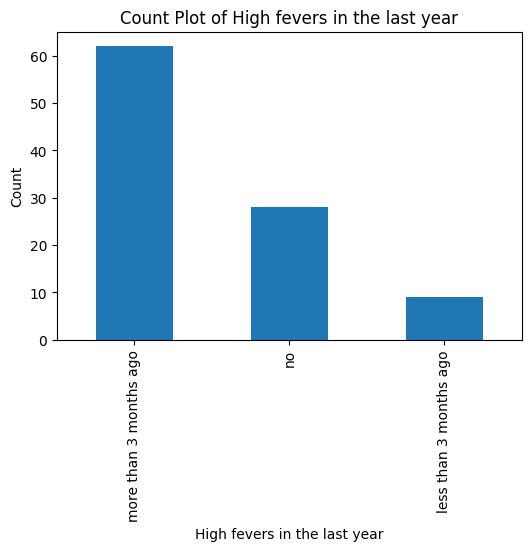

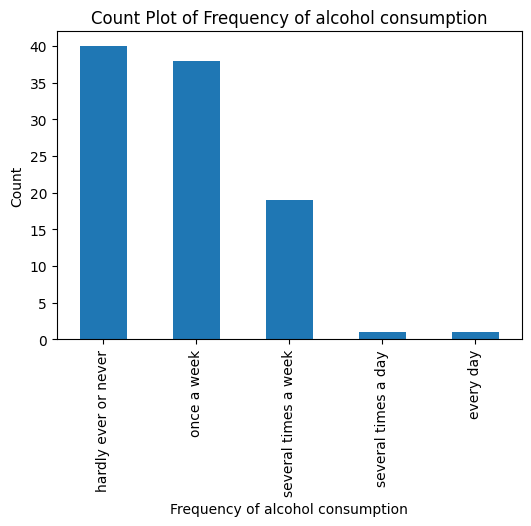

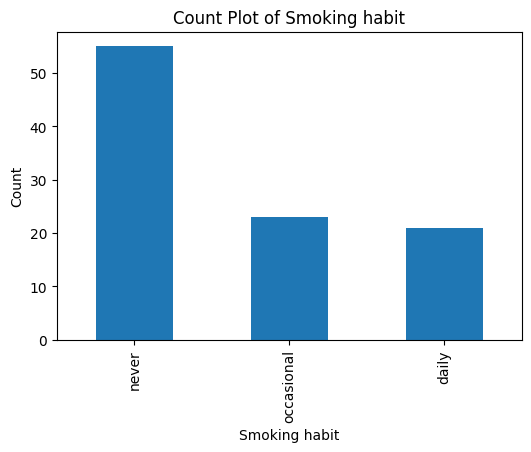

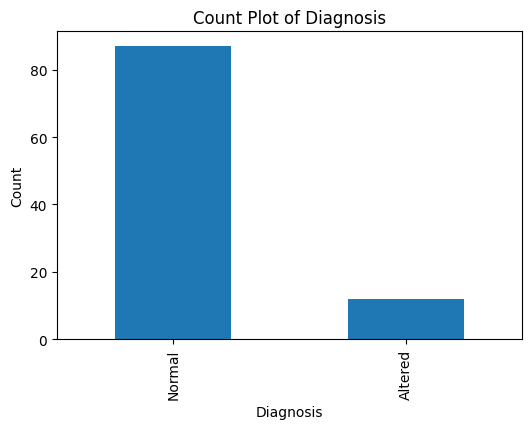

In [26]:
# Count Plots
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar') #VALUE_COUNT() يحسب تكرار كل قيمة في العمود.
    plt.title(f"Count Plot of {col}")  #plot(kind='bar') يكتب عنوان الشكل
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

**4)- Skewness & Kurtosis**

In [27]:
from scipy.stats import skew, kurtosis #skew() → لحساب الالتواء قيس هل التوزيع مائل يمين ولا شمال.
#kurtosis() → لحساب التفرطح يقيس هل التوزيع له ذيل طويل (outliers كتير) ولا لأ.
stats = pd.DataFrame(columns=["Skewness","Kurtosis"])
#تعمل جدول فاضي فيه عمودين:
#Skewness
#Kurtosis
#ولما نعمل Loop هنضيف صف لكل عمود رقمي
for col in num_cols:
    stats.loc[col] = [
        skew(df[col].dropna()),
        kurtosis(df[col].dropna())
    ]

print("\nSkewness & Kurtosis:")
print(stats)



Skewness & Kurtosis:
                                       Skewness   Kurtosis
Age                                    0.657459  -0.287427
Number of hours spent sitting per day  9.655656  92.159384


**5)- Log / √ Transformations (Optional)**

In [28]:
df_log = df.copy() #df_log → نسخة جديدة علشان نطبّق عليها Log Transformation
df_sqrt = df.copy() #df_sqrt → نسخة جديدة علشان نطبّق عليها Square Root Transformation
#النسخ مهمة علشان متغيّريش البيانات الأصلية
for col in num_cols:
    if (df[col] > 0).all():   # log يحتاج قيم موجبة فقط
    #هل كل القيم في العمود أكبر من صفر؟"

        df_log[col] = np.log(df[col]) #لو العمود كله قيمه موجبة → حوّليه باستخدام log.
        #الــ Log يقلل الـ Skewness خصوصًا لو القيم كبيرة ومتباعدة.

    df_sqrt[col] = np.sqrt(df[col]) #هنا بنطبّق الجذر التربيعي على العمود.
    #مفيد للبيانات اللي فيها أرقام كبيرة أو توزيع skewed.

print("\nLog-transformed sample:")
print(df_log.head())
#ل 5 صفوف من البيانات بعد تطبيق log

print("\nSqrt-transformed sample:")
print(df_sqrt.head())
#أول 5 صفوف بعد تطبيق sqrt



Log-transformed sample:
   Season       Age Childish diseases Accident or serious trauma  \
0  spring  3.332205               yes                        yes   
1  summer  3.465736               yes                        yes   
2    fall  3.555348               yes                        yes   
3  summer  3.401197               yes                         no   
4    fall  3.332205                no                         no   

  Surgical intervention High fevers in the last year  \
0                    no                           no   
1                    no       more than 3 months ago   
2                   yes       more than 3 months ago   
3                    no                           no   
4                    no                           no   

  Frequency of alcohol consumption Smoking habit  \
0             hardly ever or never         never   
1                      once a week         never   
2              several times a day         never   
3             hardly 

#**Bivariate Analysis**

**1)- Correlation Matrix**

In [29]:
from scipy.stats import skew, kurtosis

# Load your dataset
df = pd.read_csv("a5r dataset in42allah.csv")

# Identify numerical & categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist() #ده بيشوف في الداتا السيت اي اعمده فيها ارقام و بيجمعهم في ليست
cat_cols = df.select_dtypes(include=['object']).columns.tolist()# ده نفس الكلام بس اعمده استرينج

# Compute correlation matrix
corr_matrix = df[num_cols].corr() #بيرجع جدول فيه درجة الارتباط بين كل عمود عددي والتاني
# الارتباط (Correlation) يكون قيمته بين:

#+1 → ارتباط موجب قوي

#0 → مفيش ارتباط

#-1 → ارتباط سالب قوي

#مثال:
#لو Age و Salary طالع بينهم 0.85 → يعني كل ما السن يزيد المرتب يزيد.

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                                            Age  \
Age                                    1.000000   
Number of hours spent sitting per day -0.045923   

                                       Number of hours spent sitting per day  
Age                                                                -0.045923  
Number of hours spent sitting per day                               1.000000  


**2)- Heatmap of Correlation**

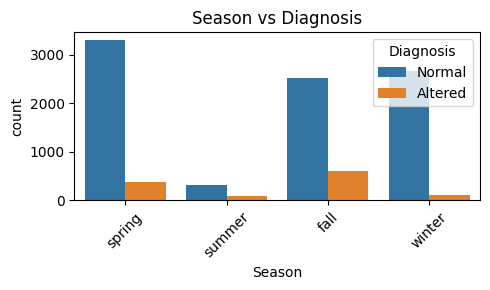

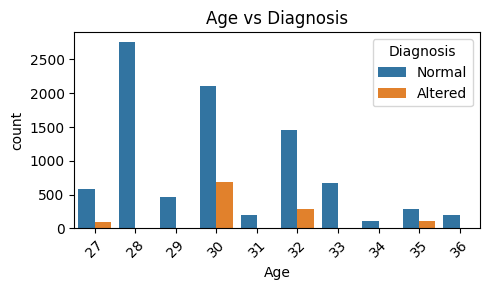

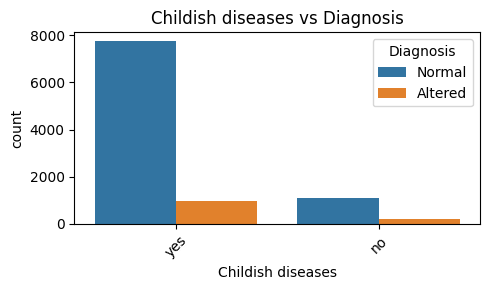

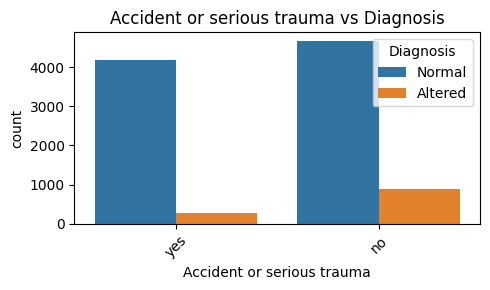

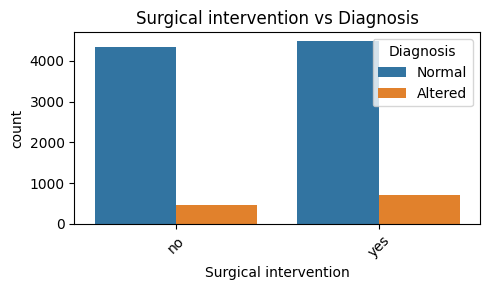

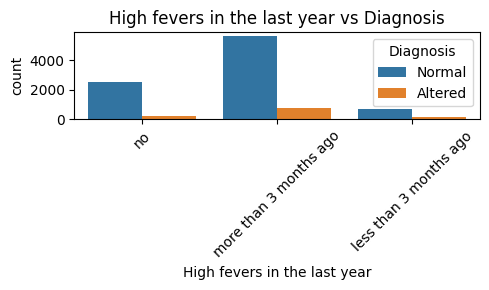

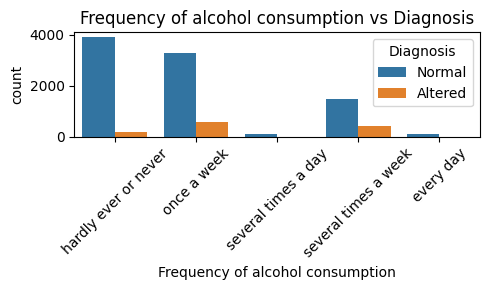

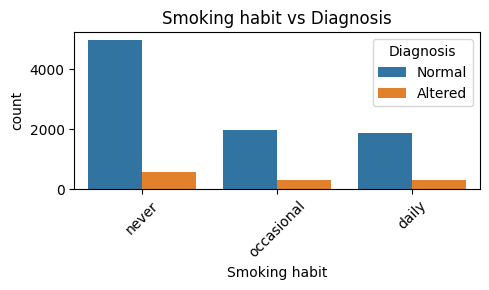

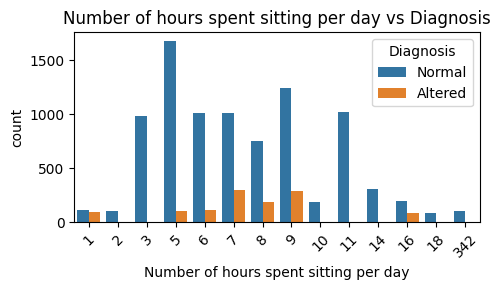

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

for predictor in df.drop(columns=['Diagnosis']).columns:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=predictor, hue='Diagnosis')
    plt.title(f'{predictor} vs Diagnosis')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



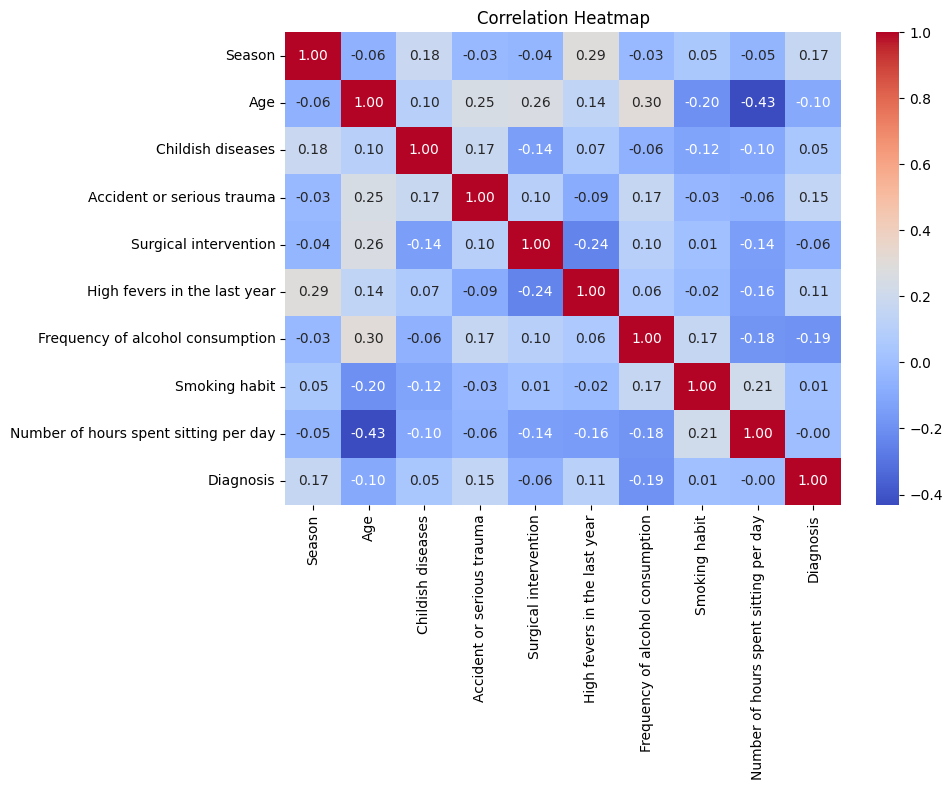

In [31]:
features = df.drop(columns=['Diagnosis'])
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
corr = df_encoded.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


**3)- Scatter Plots (Numerical vs Numerical)**

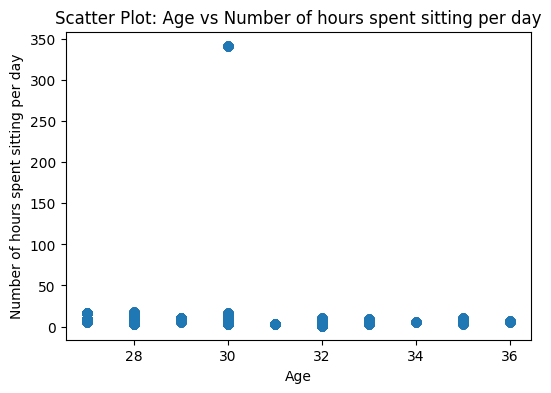

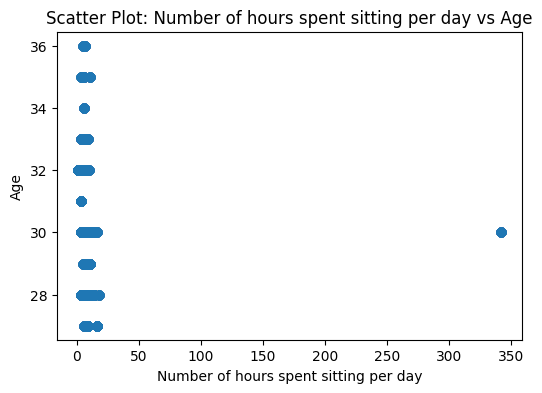

In [32]:
for col1 in num_cols: # لوب على أول عمود عددي
    for col2 in num_cols: # لوب على تاني عمود عددي
        if col1 != col2: # علشان نتجنب إن العمود يقارن نفسه بنفسه
            plt.figure(figsize=(6,4)) #مساحه الرسمه طول و عرض
            plt.scatter(df[col1], df[col2])  # رسم Scatter
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f"Scatter Plot: {col1} vs {col2}")
            plt.show()


**4)- Boxplot (Categorical vs Numerical)**

<Figure size 600x400 with 0 Axes>

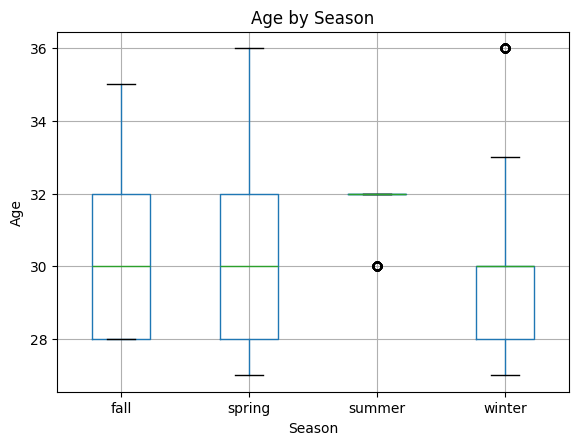

<Figure size 600x400 with 0 Axes>

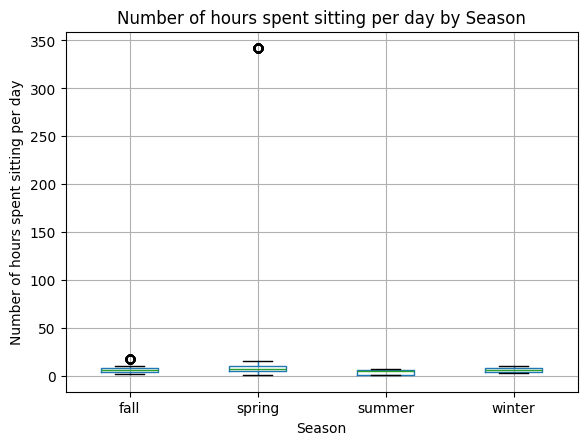

<Figure size 600x400 with 0 Axes>

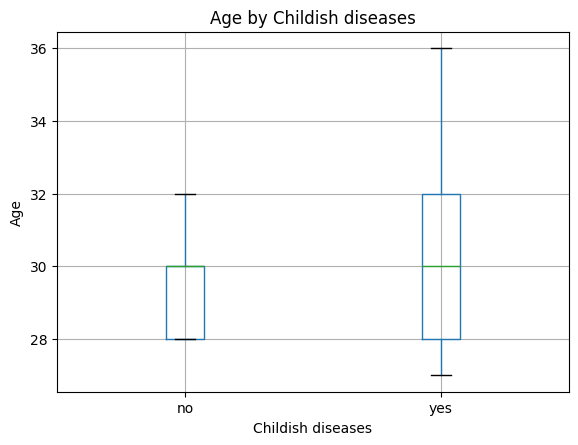

<Figure size 600x400 with 0 Axes>

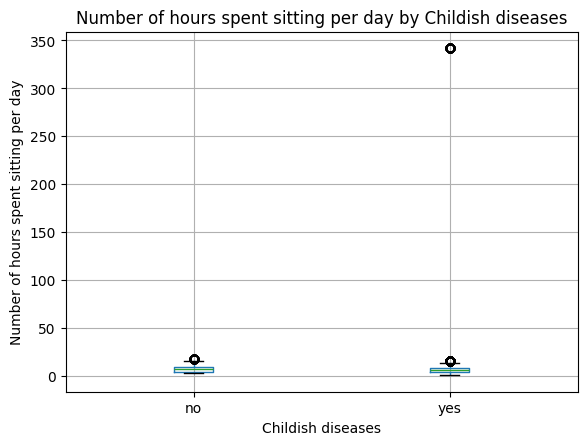

<Figure size 600x400 with 0 Axes>

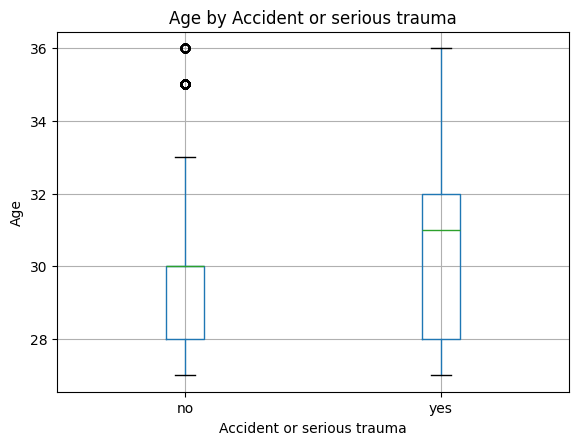

<Figure size 600x400 with 0 Axes>

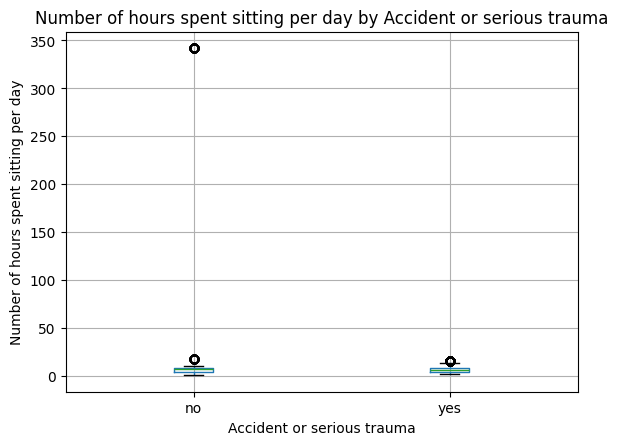

<Figure size 600x400 with 0 Axes>

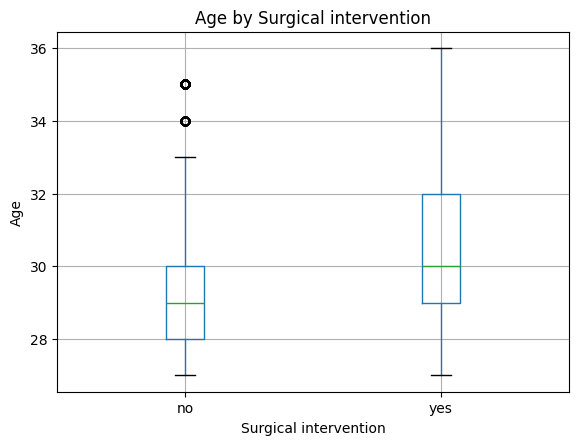

<Figure size 600x400 with 0 Axes>

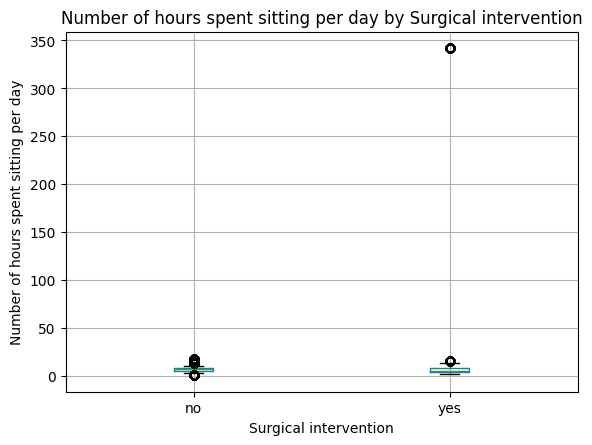

<Figure size 600x400 with 0 Axes>

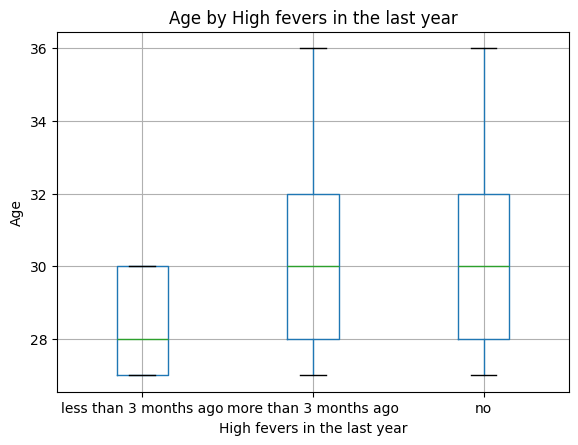

<Figure size 600x400 with 0 Axes>

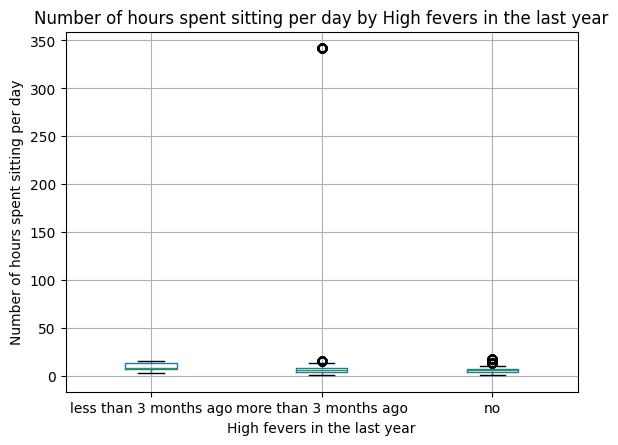

<Figure size 600x400 with 0 Axes>

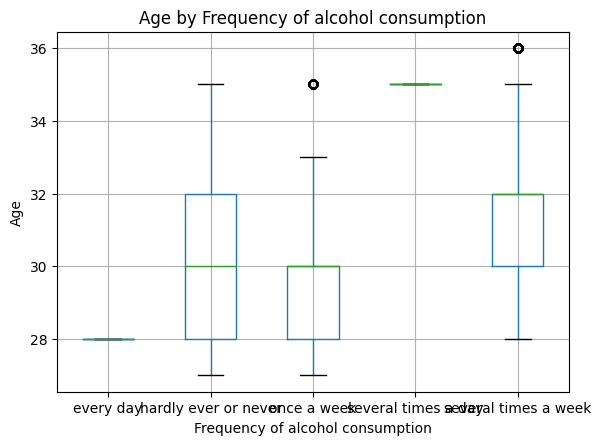

<Figure size 600x400 with 0 Axes>

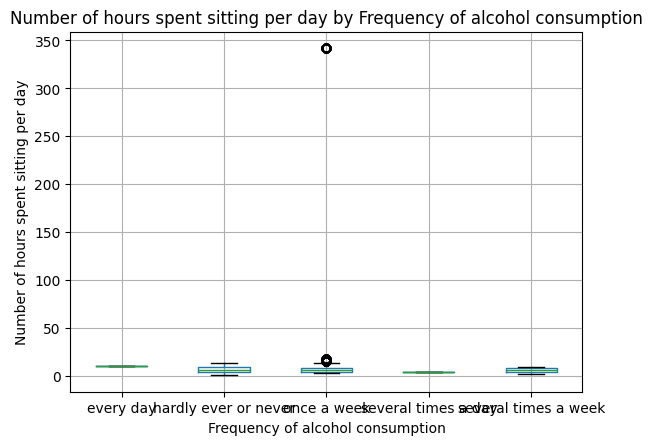

<Figure size 600x400 with 0 Axes>

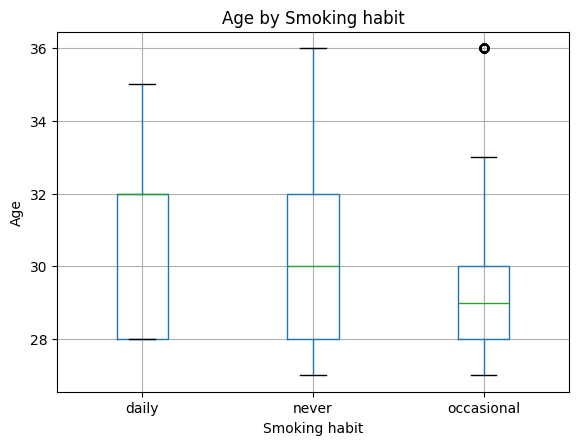

<Figure size 600x400 with 0 Axes>

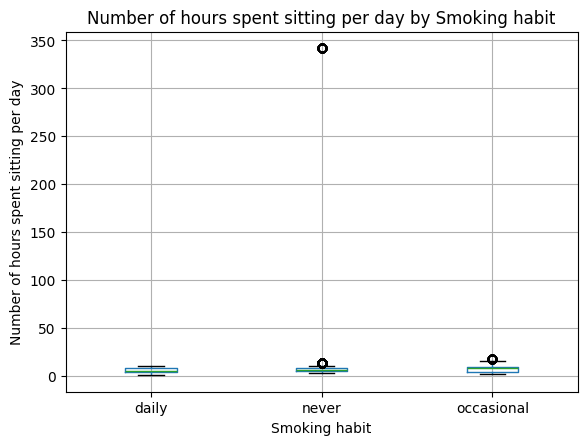

<Figure size 600x400 with 0 Axes>

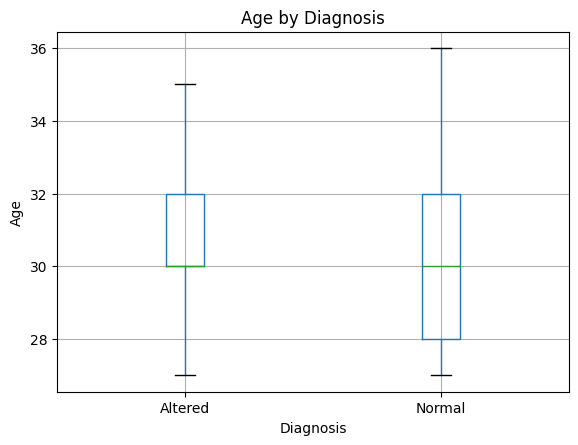

<Figure size 600x400 with 0 Axes>

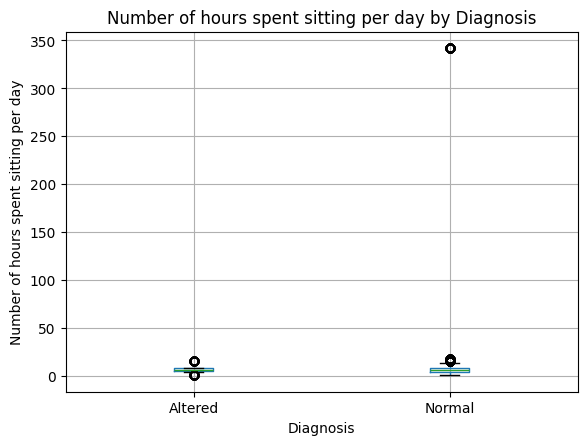

In [33]:
for cat in cat_cols: # لوب على كل عمود فئوي
    for num in num_cols: # لوب على كل عمود عددي
        plt.figure(figsize=(6,4))
        df.boxplot(column=num, by=cat)  # رسم Boxplot
        plt.title(f"{num} by {cat}")
        plt.suptitle("")   # إزالة العنوان الإضافي
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.show()

**5)- Barplot (Categorical vs Target)**

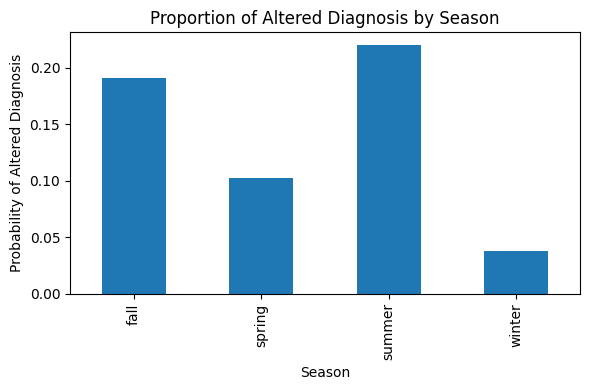

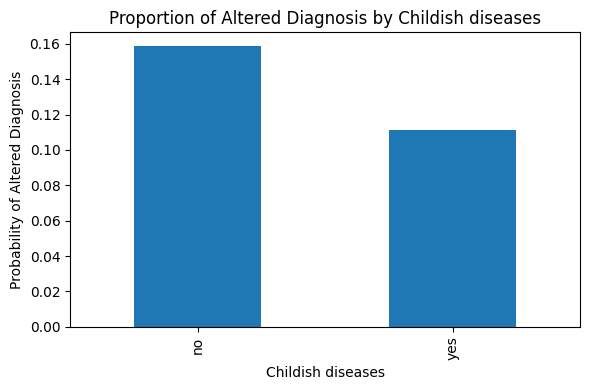

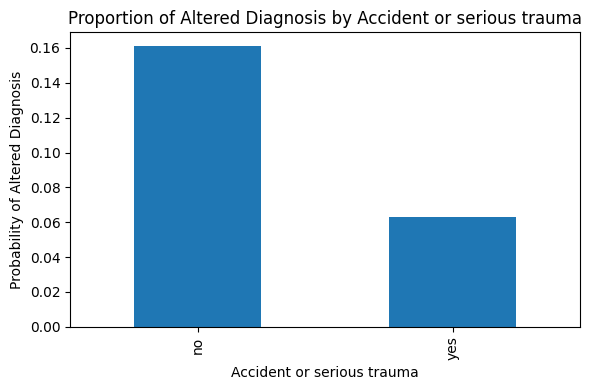

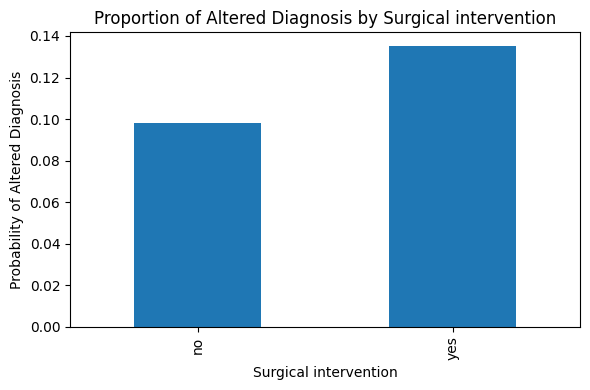

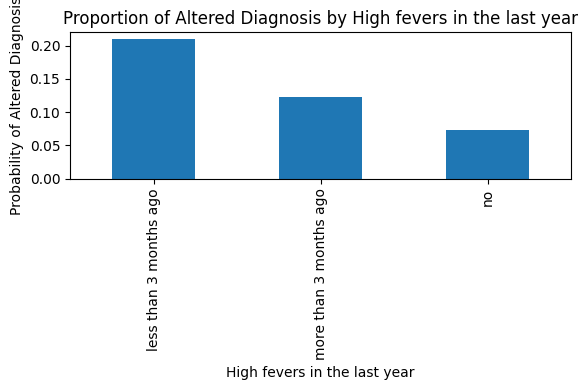

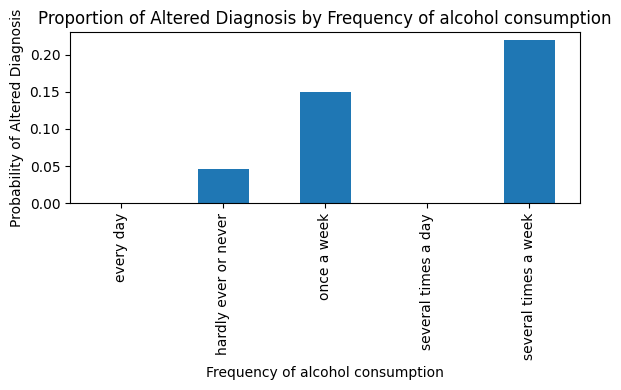

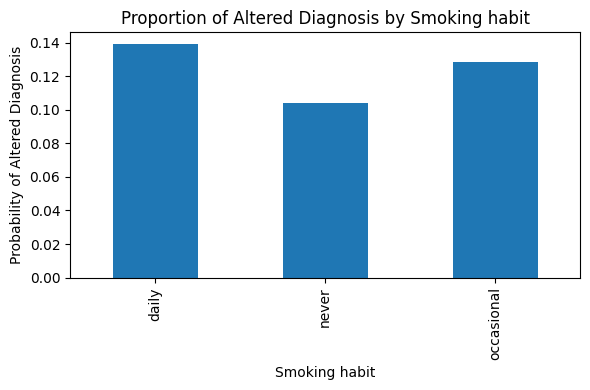

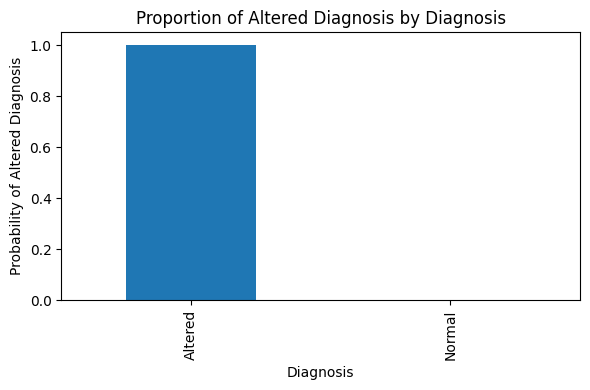

In [34]:
df_plot = df.copy()

df_plot['Diagnosis_num'] = df_plot['Diagnosis'].map({
    'Normal': 0,
    'Altered': 1
})
import matplotlib.pyplot as plt

target = 'Diagnosis_num'

for cat in cat_cols:
    plt.figure(figsize=(6,4))
    df_plot.groupby(cat)[target].mean().plot(kind='bar')
    plt.title(f"Proportion of Altered Diagnosis by {cat}")
    plt.xlabel(cat)
    plt.ylabel("Probability of Altered Diagnosis")
    plt.tight_layout()
    plt.show()


**6)- Groupby Aggregation**

In [35]:
# مثال: المتوسط، أقصى قيمة، أقل قيمة لكل categorical
for cat in cat_cols:
    print(f"\nAggregation for {cat}:")
    display(
        df.groupby(cat)[num_cols].agg(['mean','max','min','median'])
    )



Aggregation for Season:


Age                Number of hours spent sitting per day       \
             mean max min median                                  mean  max   
Season                                                                        
fall    30.068458  35  28   30.0                              7.173385   18   
spring  30.338951  36  27   30.0                             17.873607  342   
summer  31.515738  32  30   32.0                              5.307506    8   
winter  29.704170  36  27   30.0                              6.972682   11   

                   
       min median  
Season             
fall     2    7.0  
spring   1    8.0  
summer   1    6.0  
winter   3    7.0


Aggregation for Childish diseases:


Age                 \
                        mean max min median   
Childish diseases                             
no                 29.543697  32  28   30.0   
yes                30.212932  36  27   30.0   

                  Number of hours spent sitting per day                  
                                                   mean  max min median  
Childish diseases                                                        
no                                             8.508894   18   3    8.0  
yes                                           11.343632  342   1    7.0


Aggregation for Accident or serious trauma:


Age                 \
                                 mean max min median   
Accident or serious trauma                             
no                          29.635823  36  27   30.0   
yes                         30.736759  36  27   31.0   

                           Number of hours spent sitting per day           \
                                                            mean  max min   
Accident or serious trauma                                                  
no                                                     13.832071  342   1   
yes                                                     7.425045   16   2   

                                   
                           median  
Accident or serious trauma         
no                            8.0  
yes                           7.0


Aggregation for Surgical intervention:


Age                 \
                            mean max min median   
Surgical intervention                             
no                     29.530900  35  27   29.0   
yes                    30.680958  36  27   30.0   

                      Number of hours spent sitting per day                  
                                                       mean  max min median  
Surgical intervention                                                        
no                                                 8.029448   18   1    8.0  
yes                                               13.722093  342   2    6.0


Aggregation for High fevers in the last year:


Age                 \
                                   mean max min median   
High fevers in the last year                             
less than 3 months ago        28.563867  30  27   28.0   
more than 3 months ago        30.267977  36  27   30.0   
no                            30.291912  36  27   30.0   

                             Number of hours spent sitting per day           \
                                                              mean  max min   
High fevers in the last year                                                  
less than 3 months ago                                    9.828539   16   3   
more than 3 months ago                                   12.776634  342   1   
no                                                        7.102574   18   1   

                                     
                             median  
High fevers in the last year         
less than 3 months ago          9.0  
more than 3 months ago          7.0  
no                              7.0


Aggregation for Frequency of alcohol consumption:


Age                 \
                                       mean max min median   
Frequency of alcohol consumption                             
every day                         28.000000  28  28   28.0   
hardly ever or never              29.961783  35  27   30.0   
once a week                       29.477717  35  27   30.0   
several times a day               35.000000  35  35   35.0   
several times a week              31.671674  36  28   32.0   

                                 Number of hours spent sitting per day       \
                                                                  mean  max   
Frequency of alcohol consumption                                              
every day                                                    11.000000   11   
hardly ever or never                                          7.528662   14   
once a week                                                  17.173052  342   
several times a day                                           5.000000    5   
several times a week                                          6.113197   10   

                                             
                                 min median  
Frequency of alcohol consumption             
every day                         11   11.0  
hardly ever or never               1    7.0  
once a week                        3    7.0  
several times a day                5    5.0  
several times a week               2    7.0


Aggregation for Smoking habit:


Age                Number of hours spent sitting per day  \
                    mean max min median                                  mean   
Smoking habit                                                                   
daily          30.860294  35  28   32.0                              6.051930   
never          30.075248  36  27   30.0                             13.937894   
occasional     29.547818  36  27   29.0                              8.451741   

                               
               max min median  
Smoking habit                  
daily           11   1    6.0  
never          342   3    7.0  
occasional      18   2    9.0


Aggregation for Diagnosis:


Age                Number of hours spent sitting per day  \
                mean max min median                                  mean   
Diagnosis                                                                   
Altered    30.743174  35  27   30.0                              7.577645   
Normal     30.044517  36  27   30.0                             11.428410   

                           
           max min median  
Diagnosis                  
Altered     16   1    7.0  
Normal     342   1    7.0

#**Multivariate Analysis**

**1)- Pairplot**

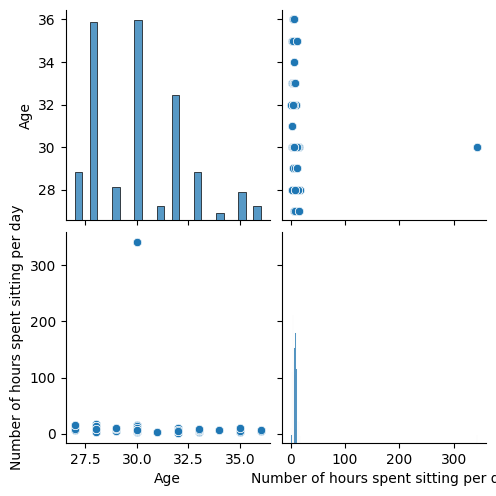

In [36]:
#يفيد في اكتشاف العلاقات بين كل numerical feature والتانية في نفس الوقت
sns.pairplot(df[num_cols])
plt.show()


**2)- 3D Scatter Plot**

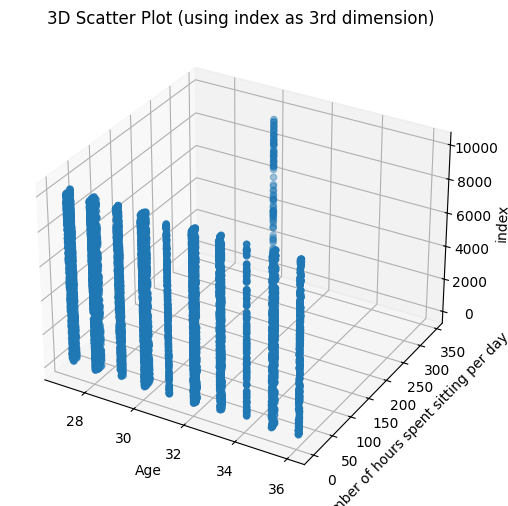

In [37]:
col1, col2 = num_cols[:2] # اختيار أول متغيرين رقميين
col3 = "index"

df["index"] = df.index  # إضافة عمود جديد يمثل رقم الصف

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[col1], df[col2], df["index"])
ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.set_zlabel("index")
ax.set_title("3D Scatter Plot (using index as 3rd dimension)")

plt.show()



**3)- K-Means Clustering**

In [38]:
#Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

In [39]:
#Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df["Cluster"].value_counts())



Cluster
0    5995
1    3898
2     107
Name: count, dtype: int64


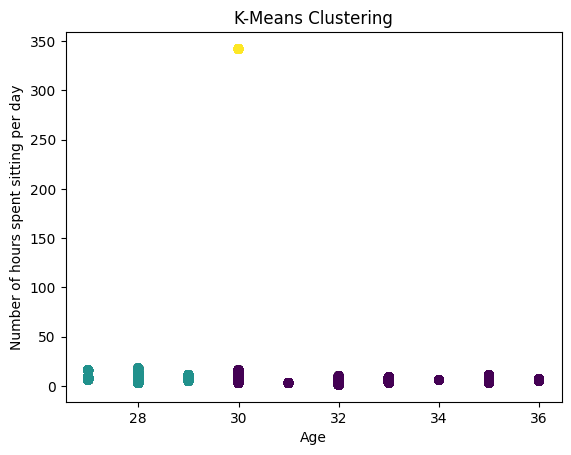

In [40]:
#Visualization (2D)
plt.scatter(df[num_cols[0]], df[num_cols[1]], c=df["Cluster"])
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.title("K-Means Clustering")
plt.show()


**4)- PCA — Principal Component Analysi**s

In [41]:
#Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df["PCA1"] = pca_components[:,0]
df["PCA2"] = pca_components[:,1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.52296148 0.47703852]


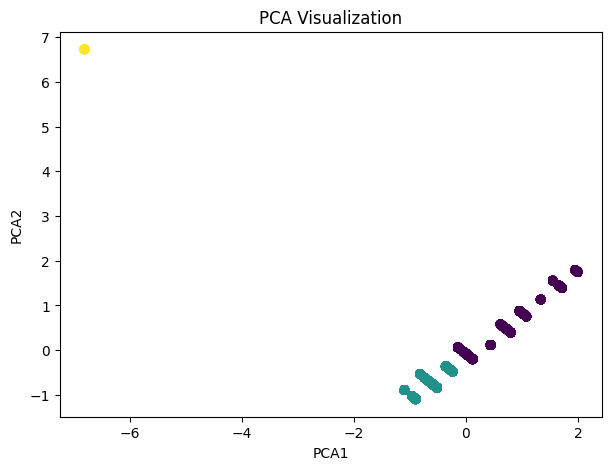

In [42]:
#Plot PCA
plt.figure(figsize=(7,5))
plt.scatter(df["PCA1"], df["PCA2"], c=df["Cluster"])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Visualization")
plt.show()


**5)- Check Multicollinearity (VIF)**

In [43]:
#Prepare Data
X = df[num_cols].dropna()

In [44]:
#Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                 Feature       VIF
0                                    Age  1.097836
1  Number of hours spent sitting per day  1.097836


**6)- Linear / Nonlinear Checker**

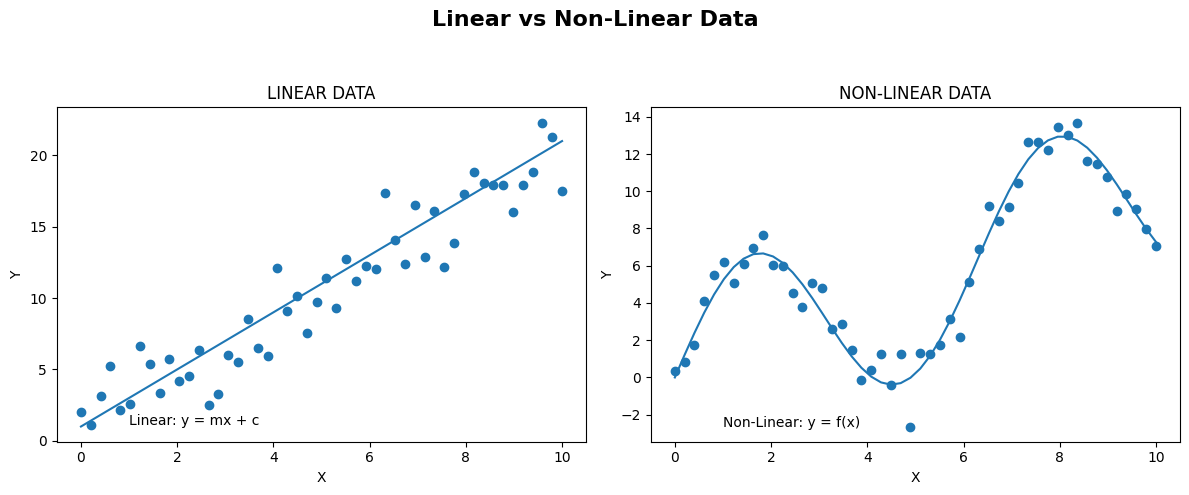

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# =========================
# Generate Linear Data
# =========================
x_linear = np.linspace(0, 10, 50)
y_linear = 2 * x_linear + 1 + np.random.normal(0, 2, 50)

# =========================
# Generate Non-Linear Data
# =========================
x_nonlinear = np.linspace(0, 10, 50)
y_nonlinear = np.sin(x_nonlinear) * 5 + x_nonlinear + np.random.normal(0, 1, 50)

# =========================
# Plot
# =========================
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Linear vs Non-Linear Data", fontsize=16, fontweight="bold")

# ----- Linear Plot -----
ax[0].scatter(x_linear, y_linear)
ax[0].plot(x_linear, 2 * x_linear + 1)
ax[0].set_title("LINEAR DATA")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].text(1, min(y_linear), "Linear: y = mx + c", fontsize=10)

# ----- Non-Linear Plot -----
ax[1].scatter(x_nonlinear, y_nonlinear)
ax[1].plot(x_nonlinear, np.sin(x_nonlinear) * 5 + x_nonlinear)
ax[1].set_title("NON-LINEAR DATA")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].text(1, min(y_nonlinear), "Non-Linear: y = f(x)", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


# **Outliers Analysis & Data Quality Checks**

**Identify numerical & categorical columns**


In [46]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()


**1)- Outliers Detection — Z-Score Method**

In [47]:
# نستخدمه عندما تكون البيانات تقريبًا Normal
from scipy.stats import zscore

df_z = df.copy()

for col in num_cols:
    df_z[col + "_zscore"] = zscore(df_z[col])

# تحديد القيم الشاذة
outliers_z = {}

for col in num_cols:
    outliers_z[col] = df_z[df_z[col + "_zscore"].abs() > 3][col]

print("Outliers using Z-Score:")
for col, values in outliers_z.items():
    print(f"{col}: {list(values)}")


Outliers using Z-Score:
Age: []
Number of hours spent sitting per day: [342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342]
index: []
PCA1: [-6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.809079936875813, -6.8090799368758

In [48]:
#Outliers Detection — IQR Method
#أفضل طريقة مع البيانات غير الطبيعية (skewed)
df_iqr = df.copy()

for col in num_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_iqr[(df_iqr[col] < lower_bound) | (df_iqr[col] > upper_bound)]

    print(f"\nIQR Outliers for {col}:")
    print(outliers[col])



IQR Outliers for Age:
Series([], Name: Age, dtype: int64)

IQR Outliers for Number of hours spent sitting per day:
4        18
41      342
45      342
62       16
109      16
       ... 
9839     16
9889     16
9905     16
9973     16
9976     16
Name: Number of hours spent sitting per day, Length: 478, dtype: int64

IQR Outliers for index:
Series([], Name: index, dtype: int64)

IQR Outliers for PCA1:
41     -6.80908
45     -6.80908
157    -6.80908
204    -6.80908
345    -6.80908
         ...   
9001   -6.80908
9092   -6.80908
9239   -6.80908
9256   -6.80908
9393   -6.80908
Name: PCA1, Length: 107, dtype: float64

IQR Outliers for PCA2:
41      6.728544
45      6.728544
157     6.728544
204     6.728544
345     6.728544
          ...   
9001    6.728544
9092    6.728544
9239    6.728544
9256    6.728544
9393    6.728544
Name: PCA2, Length: 107, dtype: float64


In [49]:
#Cleaning Outliers (IQR Method Recommended)
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("\nShape after cleaning:", df_clean.shape)



Shape after cleaning: (9522, 14)


**2)- Visual Check After Cleaning**

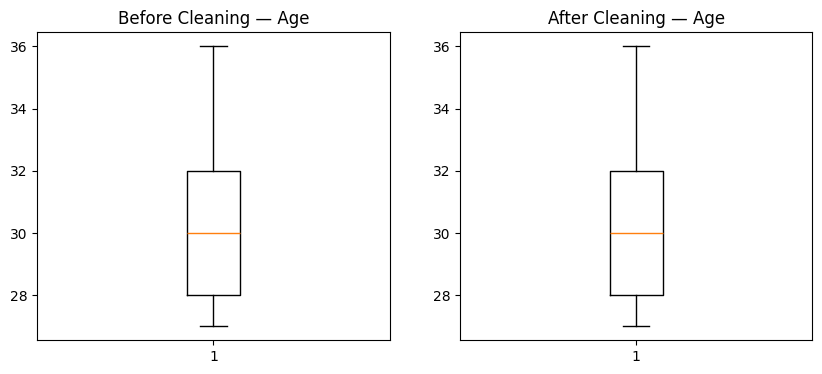

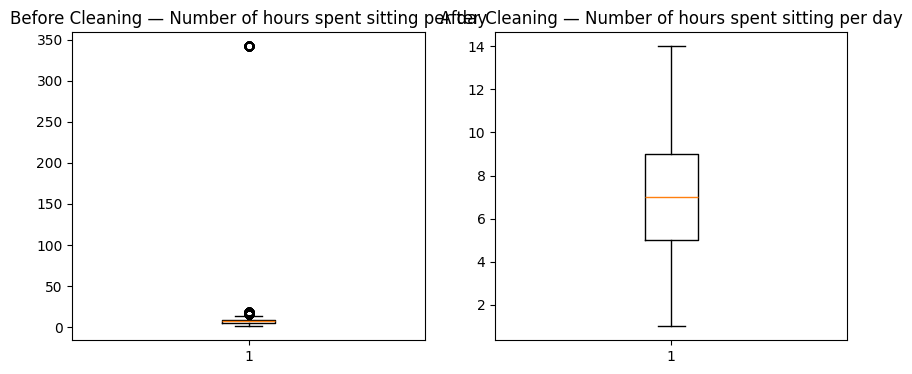

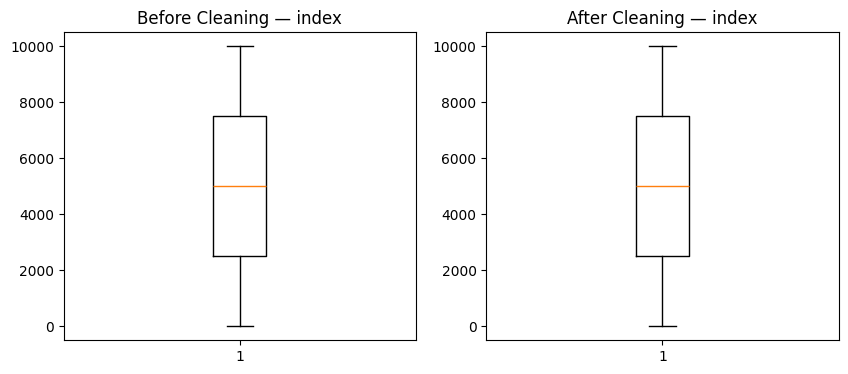

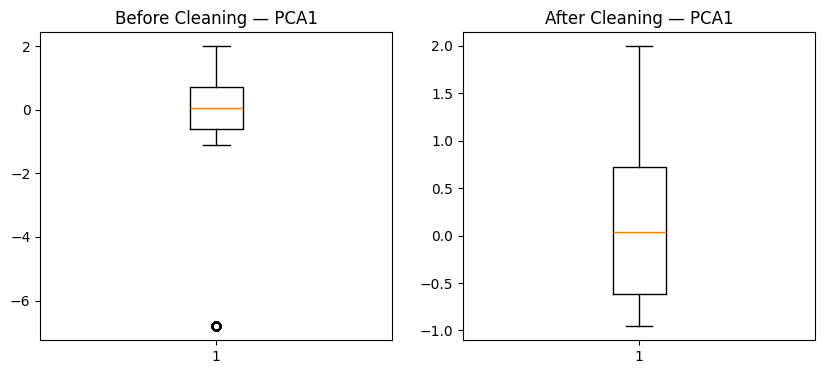

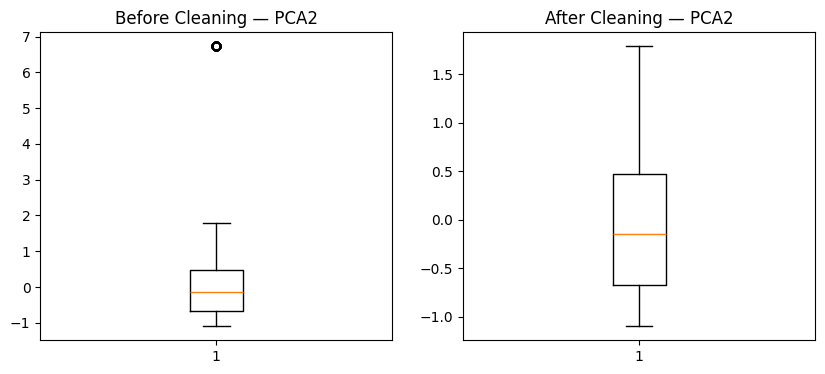

In [50]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    axes[0].boxplot(df[col])
    axes[0].set_title(f"Before Cleaning — {col}")

    axes[1].boxplot(df_clean[col])
    axes[1].set_title(f"After Cleaning — {col}")

    plt.show()


**3)- Check Logical Validity**

In [51]:
invalid_rows = pd.DataFrame()

# قيم غير منطقية
invalid_rows["age_invalid"] = df[df["Age"] < 0]["Age"]
invalid_rows["sitting_invalid"] = df[(df["Number of hours spent sitting per day"] < 0) |
                                     (df["Number of hours spent sitting per day"] > 24)]["Number of hours spent sitting per day"]

print("\nLogical Invalid Values:")
print(invalid_rows.dropna(how="all"))




Logical Invalid Values:
      age_invalid  sitting_invalid
41            NaN              342
45            NaN              342
157           NaN              342
204           NaN              342
345           NaN              342
...           ...              ...
9001          NaN              342
9092          NaN              342
9239          NaN              342
9256          NaN              342
9393          NaN              342

[107 rows x 2 columns]


**4)- Identify Rare Categories (Low Frequency Categories)**

In [52]:
#نستخدمها لمعرفة الفئات النادرة → خصوصًا قبل encoding
rare_categories = {}

for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < 0.05]  # أقل من 5% تعتبر rare
    rare_categories[col] = rare

print("\nRare Categories (<5%):")
for col, values in rare_categories.items():
    print(f"{col}:")
    print(values)
    print("--------------")



Rare Categories (<5%):
Season:
Season
summer    0.0413
Name: proportion, dtype: float64
--------------
Childish diseases:
Series([], Name: proportion, dtype: float64)
--------------
Accident or serious trauma:
Series([], Name: proportion, dtype: float64)
--------------
Surgical intervention:
Series([], Name: proportion, dtype: float64)
--------------
High fevers in the last year:
Series([], Name: proportion, dtype: float64)
--------------
Frequency of alcohol consumption:
Frequency of alcohol consumption
every day              0.0111
several times a day    0.0106
Name: proportion, dtype: float64
--------------
Smoking habit:
Series([], Name: proportion, dtype: float64)
--------------
Diagnosis:
Series([], Name: proportion, dtype: float64)
--------------


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 399.6 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/8.0 MB 399.6 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/8.0 MB 399.6 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/8.0 MB 399.6 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/8.0 MB 399.6 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/8.0 MB 335.7 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/8.0 MB 335.7 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/8.0 MB 335.7 kB/s eta 0:00:22
   --- ------------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\zaina\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
#ydata_profiling
# ydata_profiling
import matplotlib
matplotlib.use("Agg")  # يجبر matplotlib يستخدم backend مناسب لإنشاء الرسومات بدون GUI
import pandas as pd
from ydata_profiling import ProfileReport



profile = ProfileReport(df, title="EDA Report - a5r dataset", minimal=False)
profile.to_file("eda_report_ydata.html")
print("Saved eda_report_ydata.html")



Summarize dataset:  76%|███████▌  | 16/21 [00:00<00:00, 18.75it/s, Calculate auto correlation]c:\Users\zaina\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Summarize dataset:  37%|███▋      | 17/46 [00:00<00:01, 22.55it/s, scatter Age, Age]          


ModuleNotFoundError: No module named 'matplotlib.backends.backend_svg'

#**Data Preprocessing**

**1)- Encoding Categorical Variables**

In [ ]:
import pandas as pd

df = pd.read_csv("a5r dataset in42allah.csv")

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()


Age  Number of hours spent sitting per day  Season_spring  Season_summer  \
0   28                                     14           True          False   
1   32                                      7          False           True   
2   35                                      5          False          False   
3   30                                      6          False           True   
4   28                                     18          False          False   

   Season_winter  Childish diseases_yes  Accident or serious trauma_yes  \
0          False                   True                            True   
1          False                   True                            True   
2          False                   True                            True   
3          False                   True                           False   
4          False                  False                           False   

   Surgical intervention_yes  \
0                      False   
1                      False   
2                       True   
3                      False   
4                      False   

   High fevers in the last year_more than 3 months ago  \
0                                              False     
1                                               True     
2                                               True     
3                                              False     
4                                              False     

   High fevers in the last year_no  \
0                             True   
1                            False   
2                            False   
3                             True   
4                             True   

   Frequency of alcohol consumption_hardly ever or never  \
0                                               True       
1                                              False       
2                                              False       
3                                               True       
4                                              False       

   Frequency of alcohol consumption_once a week  \
0                                         False   
1                                          True   
2                                         False   
3                                         False   
4                                          True   

   Frequency of alcohol consumption_several times a day  \
0                                              False      
1                                              False      
2                                               True      
3                                              False      
4                                              False      

   Frequency of alcohol consumption_several times a week  Smoking habit_never  \
0                                              False                     True   
1                                              False                     True   
2                                              False                     True   
3                                              False                     True   
4                                              False                    False   

   Smoking habit_occasional  Diagnosis_Normal  
0                     False              True  
1                     False              True  
2                     False              True  
3                     False              True  
4                      True              True

ليه بنعملها؟

الموديل الرياضي مايفهمش الكلام النصي

One-Hot Encoding يمنع إن الموديل يتخيل إن فيه ترتيب بين الفئات

drop_first=True يمنع الـ multicollinearity

**2)- Feature Scaling (Standardization)**

In [ ]:

from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = df_encoded.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled.head()


Age  Number of hours spent sitting per day  Season_spring  \
0 -0.958011                               0.087416           True   
1  0.844116                              -0.115010          False   
2  2.195711                              -0.172846          False   
3 -0.056947                              -0.143928          False   
4 -0.958011                               0.203089          False   

   Season_summer  Season_winter  Childish diseases_yes  \
0          False          False                   True   
1           True          False                   True   
2          False          False                   True   
3           True          False                   True   
4          False          False                  False   

   Accident or serious trauma_yes  Surgical intervention_yes  \
0                            True                      False   
1                            True                      False   
2                            True                       True   
3                           False                      False   
4                           False                      False   

   High fevers in the last year_more than 3 months ago  \
0                                              False     
1                                               True     
2                                               True     
3                                              False     
4                                              False     

   High fevers in the last year_no  \
0                             True   
1                            False   
2                            False   
3                             True   
4                             True   

   Frequency of alcohol consumption_hardly ever or never  \
0                                               True       
1                                              False       
2                                              False       
3                                               True       
4                                              False       

   Frequency of alcohol consumption_once a week  \
0                                         False   
1                                          True   
2                                         False   
3                                         False   
4                                          True   

   Frequency of alcohol consumption_several times a day  \
0                                              False      
1                                              False      
2                                               True      
3                                              False      
4                                              False      

   Frequency of alcohol consumption_several times a week  Smoking habit_never  \
0                                              False                     True   
1                                              False                     True   
2                                              False                     True   
3                                              False                     True   
4                                              False                    False   

   Smoking habit_occasional  Diagnosis_Normal  
0                     False              True  
1                     False              True  
2                     False              True  
3                     False              True  
4                      True              True

علشان الأعمدة اللي فيها قيم كبيرة (زي العمر) ما تطغاش على الأعمدة الصغيرة

بيحسن أداء الموديل جدًا

**3)- Outlier Detection & Treatment**

In [ ]:
import numpy as np

df_clean = df_scaled.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean.head()


Age  Number of hours spent sitting per day  Season_spring  \
0 -0.958011                               0.087416           True   
1  0.844116                              -0.115010          False   
2  2.195711                              -0.172846          False   
3 -0.056947                              -0.143928          False   
5 -0.056947                              -0.172846          False   

   Season_summer  Season_winter  Childish diseases_yes  \
0          False          False                   True   
1           True          False                   True   
2          False          False                   True   
3           True          False                   True   
5          False          False                  False   

   Accident or serious trauma_yes  Surgical intervention_yes  \
0                            True                      False   
1                            True                      False   
2                            True                       True   
3                           False                      False   
5                           False                       True   

   High fevers in the last year_more than 3 months ago  \
0                                              False     
1                                               True     
2                                               True     
3                                              False     
5                                               True     

   High fevers in the last year_no  \
0                             True   
1                            False   
2                            False   
3                             True   
5                            False   

   Frequency of alcohol consumption_hardly ever or never  \
0                                               True       
1                                              False       
2                                              False       
3                                               True       
5                                              False       

   Frequency of alcohol consumption_once a week  \
0                                         False   
1                                          True   
2                                         False   
3                                         False   
5                                          True   

   Frequency of alcohol consumption_several times a day  \
0                                              False      
1                                              False      
2                                               True      
3                                              False      
5                                              False      

   Frequency of alcohol consumption_several times a week  Smoking habit_never  \
0                                              False                     True   
1                                              False                     True   
2                                              False                     True   
3                                              False                     True   
5                                              False                     True   

   Smoking habit_occasional  Diagnosis_Normal  
0                     False              True  
1                     False              True  
2                     False              True  
3                     False              True  
5                     False              True

 ليه بنعملها؟

الـ Outliers بتشوّه الموديل

بتأثر على المتوسط والانحراف المعياري

بتسبب Overfitting

4)- Handle Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE

X = df_clean.drop("Diagnosis_Normal", axis=1)
y = df_clean["Diagnosis_Normal"]


sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())


Before SMOTE: Diagnosis_Normal
True     8437
False    1085
Name: count, dtype: int64
After SMOTE: Diagnosis_Normal
True     8437
False    8437
Name: count, dtype: int64


لو الفئة المستهدفة فيها عدد أكبر من الثانية (مثلاً 90% healthy, 10% not healthy)، الموديل بيتعلم ينحاز للـ 90%.
بيزود الفئة الصغيرة بطريقة ذكية
(Synthesized samples)

يعالج عدم التوازن بدون حذف بيانات

5)- Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

X_train.shape, X_test.shape


((13499, 16), (3375, 16))

📌 ليه بنعملها؟

علشان ندرّب على جزء، ونختبر على جزء تاني

stratify=True يحافظ على توازن الفئات في train و test

#**Build & Train Model**

In [ ]:
import pandas as pd
import joblib

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load data
df = pd.read_csv("a5r dataset in42allah.csv")

# Target
y = df["Diagnosis"].map({"Normal": 0, "Altered": 1})
X = df.drop("Diagnosis", axis=1)

# Columns
num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Pipeline
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# 🔥 تدريب على كل الداتا
pipeline.fit(X, y)

# Save model
joblib.dump(pipeline, "fertility_pipeline.pkl")

print("✅ Training finished & model saved")

✅ Training finished & model saved


#**Model Evaluation**

In [ ]:
# ==================== تحضير البيانات للتدريب ====================
from sklearn.preprocessing import LabelEncoder

# 1. نسخة من البيانات الأصلية
df_encoded = df.copy()

# 2. تحويل الأعمدة النصية إلى رقمية باستخدام LabelEncoder
le_dict = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    le_dict[column] = le  # حفظ الـ encoder للاستخدام لاحقاً إذا احتجت

print("✅ All categorical columns encoded successfully!")
print(f"Encoded columns: {list(le_dict.keys())}")
print("\nFirst 5 rows after encoding:")
print(df_encoded.head())

✅ All categorical columns encoded successfully!
Encoded columns: ['Season', 'Childish diseases', 'Accident or serious trauma', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Diagnosis']

First 5 rows after encoding:
   Season  Age  Childish diseases  Accident or serious trauma  \
0       1   28                  1                           1   
1       2   32                  1                           1   
2       0   35                  1                           1   
3       2   30                  1                           0   
4       0   28                  0                           0   

   Surgical intervention  High fevers in the last year  \
0                      0                             2   
1                      0                             1   
2                      1                             1   
3                      0                             2   
4                      0               

In [ ]:
# ==================== فصل X و y ====================

# X: كل الأعمدة ما عدا Diagnosis
# y: عمود Diagnosis فقط
X = df_encoded.drop('Diagnosis', axis=1)
y = df_encoded['Diagnosis']

print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")
print(f"\n✅ X columns: {X.columns.tolist()}")
print(f"✅ y unique values: {y.unique()}")

# تحقق من توزيع الفئات في y
print(f"\n🔍 Distribution of Diagnosis:")
print(y.value_counts())
print(f"\nPercentage:")
print(y.value_counts(normalize=True) * 100)

✅ X shape: (10000, 9)
✅ y shape: (10000,)

✅ X columns: ['Season', 'Age', 'Childish diseases', 'Accident or serious trauma', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Number of hours spent sitting per day']
✅ y unique values: [1 0]

🔍 Distribution of Diagnosis:
Diagnosis
1    8828
0    1172
Name: count, dtype: int64

Percentage:
Diagnosis
1    88.28
0    11.72
Name: proportion, dtype: float64


In [ ]:
# ==================== تقسيم البيانات ====================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # للحفاظ على نفس توزيع الفئات في التدريب والاختبار
)

print(f"✅ Training set size: {X_train.shape}")
print(f"✅ Testing set size: {X_test.shape}")
print(f"\n🔍 Target distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\n🔍 Target distribution in testing set:")
print(y_test.value_counts(normalize=True))

✅ Training set size: (8000, 9)
✅ Testing set size: (2000, 9)

🔍 Target distribution in training set:
Diagnosis
1    0.88275
0    0.11725
Name: proportion, dtype: float64

🔍 Target distribution in testing set:
Diagnosis
1    0.883
0    0.117
Name: proportion, dtype: float64


In [ ]:
# ==================== Scaling البيانات ====================
scaler = StandardScaler()

# تطبيق Scaling على X فقط (ليس على y لأنها الفئة)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data scaling completed!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# تحويلها مرة أخرى إلى DataFrame للوضوح (اختياري)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\n📊 First 3 rows of scaled training data:")
print(X_train_scaled_df.head(3))

✅ Data scaling completed!
X_train_scaled shape: (8000, 9)
X_test_scaled shape: (2000, 9)

📊 First 3 rows of scaled training data:
     Season       Age  Childish diseases  Accident or serious trauma  \
0 -0.247138  0.835140           0.388689                   -0.899065   
1 -0.247138 -0.964003           0.388689                    1.112266   
2  1.452135  0.835140           0.388689                   -0.899065   

   Surgical intervention  High fevers in the last year  \
0              -1.041876                      1.431044   
1              -1.041876                     -0.324569   
2               0.959807                     -0.324569   

   Frequency of alcohol consumption  Smoking habit  \
0                         -0.873645      -1.514822   
1                          0.033331       1.487798   
2                         -0.873645      -0.013512   

   Number of hours spent sitting per day  
0                              -0.287343  
1                               0.083519  
2 

In [ ]:
# ==================== تدريب Random Forest ====================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# إنشاء المودل
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # استخدام كل المعالجات
)

# تدريب المودل
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [ ]:
# ==================== التنبؤ والتقييم ====================

# التنبؤ على بيانات الاختبار
y_pred = rf_model.predict(X_test_scaled)

# تقييم المودل
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\n" + "="*50)
print("📋 Classification Report:")
print("="*50)
print(classification_report(y_test, y_pred))

print("\n" + "="*50)
print("🔢 Confusion Matrix:")
print("="*50)
print(confusion_matrix(y_test, y_pred))

📊 Model Accuracy: 0.9915 (99.15%)

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       234
           1       0.99      1.00      1.00      1766

    accuracy                           0.99      2000
   macro avg       1.00      0.96      0.98      2000
weighted avg       0.99      0.99      0.99      2000


🔢 Confusion Matrix:
[[ 217   17]
 [   0 1766]]


In [ ]:
# ==================== تجربة Logistic Regression ====================
from sklearn.linear_model import LogisticRegression

# إنشاء وتدريب Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# التنبؤ والتقييم
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8700 (87.00%)

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.27      0.06      0.10       234
           1       0.89      0.98      0.93      1766

    accuracy                           0.87      2000
   macro avg       0.58      0.52      0.52      2000
weighted avg       0.81      0.87      0.83      2000



**1)- F1 Score**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="weighted")
print(f1)


0.8332220466586113


**2)- ROC-AUC Score**

In [ ]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7884458092555489


**3)- Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.87


**4)- Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.27      0.06      0.10       234
           1       0.89      0.98      0.93      1766

    accuracy                           0.87      2000
   macro avg       0.58      0.52      0.52      2000
weighted avg       0.81      0.87      0.83      2000



#**Save Deployment Model In Streamilt**

In [ ]:
from google.colab import files
files.upload()   # وارفعي a5r dataset in42allah.csv

Saving a5r dataset in42allah.csv to a5r dataset in42allah (5).csv


{'a5r dataset in42allah (5).csv': b'Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis\nspring,28,yes,yes,no,no,hardly ever or never,never,14,Normal\nsummer,32,yes,yes,no,more than 3 months ago,once a week,never,7,Normal\nfall,35,yes,yes,yes,more than 3 months ago,several times a day,never,5,Normal\nsummer,30,yes,no,no,no,hardly ever or never,never,6,Normal\nfall,28,no,no,no,no,once a week,occasional,18,Normal\nfall,30,no,no,yes,more than 3 months ago,once a week,never,5,Normal\nspring,35,yes,no,no,no,several times a week,never,3,Normal\nspring,32,yes,yes,yes,more than 3 months ago,several times a week,daily,5,Normal\nwinter,28,yes,no,no,no,once a week,never,11,Normal\nwinter,28,yes,no,no,no,once a week,never,11,Normal\nspring,32,yes,yes,yes,no,once a week,daily,5,Normal\nwinter,30,no,yes,yes,more than 3 months ago,several times a week,n

In [ ]:
from google.colab import files
files.download("fertility_pipeline.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit


In [ ]:
!pip install shap

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
st.set_page_config(page_title="Fertility Diagnosis", layout="wide")

model = joblib.load("fertility_pipeline.pkl")

st.title("🧬 Fertility Diagnosis Prediction App")
st.write("Enter the details below to get a fertility diagnosis.")

col1, col2 = st.columns(2)

with col1:
    Age = st.slider("Age", 18, 50, 25)
    Hours = st.slider("Number of hours spent sitting per day", 1, 16, 6)
    Season = st.selectbox("Season", ["spring", "summer", "winter","autum"])
    Childish = st.selectbox("Childish diseases", ["yes", "no"])
    Trauma = st.selectbox("Accident or serious trauma", ["yes", "no"])
    Surgery = st.selectbox("Surgical intervention", ["yes", "no"])

with col2:
    Fevers = st.selectbox(
        "High fevers in last year",
        ["more than 3 months ago","less than 3 months", "no"]
    )
    Alcohol = st.selectbox(
        "Frequency of alcohol consumption",
        ["hardly ever or never",
         "once a week",
         "several times a week",
         "several times a day"]
    )
    Smoking = st.selectbox(
        "Smoking habit",
        ["never", "occasional"]
    )

new_data = pd.DataFrame([{
    "Age": Age,
    "Number of hours spent sitting per day": Hours,
    "Season": Season,
    "Childish diseases": Childish,
    "Accident or serious trauma": Trauma,
    "Surgical intervention": Surgery,
    "High fevers in the last year": Fevers,
    "Frequency of alcohol consumption": Alcohol,
    "Smoking habit": Smoking
}])

st.subheader("📋 Entered Data")
st.write(new_data)

if st.button("🔍 Predict Diagnosis"):
    pred = model.predict(new_data)[0]
    proba = model.predict_proba(new_data)[0][1] * 100

    if pred == 1:
        st.error("🔴 Diagnosis: Altered fertility")
    else:
        st.success("🟢 Diagnosis: Normal fertility")

    st.info(f"Probability of altered fertility: {proba:.2f}%")

# =========================
# SHAP Explainability
# =========================
st.subheader("🔎 SHAP Explanation")
st.write("Shows how each feature affects the prediction")

# نجيب أسماء الـ features بعد الـ preprocessing
preprocessor = model.named_steps["preprocess"]
feature_names = preprocessor.get_feature_names_out()

# نحول الـ input بعد الـ preprocessing
X_transformed = preprocessor.transform(new_data)

# نجيب الموديل نفسه
clf = model.named_steps["model"]

# ===== Background data for SHAP (بديل X) =====
# نعمل 50 نسخة من بيانات المستخدم كـ background
background = pd.concat([new_data] * 50, ignore_index=True)
background_transformed = preprocessor.transform(background)

# SHAP Explainer
explainer = shap.LinearExplainer(
    clf,
    background_transformed,
    feature_names=feature_names
)

# نحسب SHAP values
shap_values = explainer(X_transformed)

# -------- Waterfall Plot --------
st.markdown("### 🔹 Feature Contribution (Waterfall Plot)")
fig, ax = plt.subplots(figsize=(8,5))
shap.plots.waterfall(shap_values[0], show=False)
st.pyplot(fig)

# -------- Bar Plot --------
st.markdown("### 🔹 Feature Importance (Bar Plot)")
fig2, ax2 = plt.subplots(figsize=(8,5))
shap.plots.bar(shap_values[0], show=False)
st.pyplot(fig2)


Overwriting app.py


In [ ]:
!pip install streamlit cloudflared


In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared


--2025-12-20 21:58:28--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2025-12-20 21:58:28--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-20T22%3A40%3A20Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-20

In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
!cloudflared tunnel --url http://localhost:8501


2025-12-20T21:58:29Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-12-20T21:58:29Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-12-20T21:58:32Z INF +--------------------------------------------------------------------------------------------+
2025-12-20T21:58:32Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-12-20T21:58:32Z INF |  https://stronger-hits-uploaded-bomb.trycloudflare.com